<a href="https://colab.research.google.com/github/jidemaestri/Financial-Markets/blob/master/CAPM_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Setup <h2>

In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 73.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
MONTHS_PER_YEAR = 12
RISK_FREE_RATE = 0.05

<h2> Python Class  - only set for the first stock related to SP500 <h2>

In [11]:
class CAPM: 
  def __init__(self, stocks, start_date, end_date):
    self.stocks = stocks
    self.data = None
    self.start_date = start_date
    self.end_date = end_date

  def download_data(self):
    data = {}
    
    for stock in self.stocks:
      ticker = yf.download(stock, self.start_date, self.end_date)
      data[stock] = ticker["Adj Close"]
    return pd.DataFrame(data)

  def initialize(self):
      stock_data = self.download_data()
      stocks_data = stock_data.resample("M").last() #using monthly returns
      print(stocks_data)

      self.data = pd.DataFrame({"stock_adj_close": stocks_data[self.stocks[0]],
                                'market_adj_close': stocks_data[self.stocks[1]] })
      
      #calculating logarithmic monthly return
      
      self.data[["stock_returns", "market_returns"]] = np.log(self.data[["stock_adj_close", "market_adj_close"]]/
                                                              self.data[["stock_adj_close", "market_adj_close"]].shift(1))
      
      self.data = self.data[1:]
      print(self.data)
  
  def calculate_beta(self):
    #covariance matrix
    covariance_matrix = np.cov(self.data["stock_returns"], self.data["market_returns"])
    #calculating beta
    beta = covariance_matrix[0,1] / covariance_matrix[1,1]
    #"1" is the sp500, so [0,1] is equal to the covariance between the stock and the market, and [1,1] is the covariance of the market itself
    print("Beta is: ", beta)
  
  def regression(self):
  #using linear regression - beta is the slope
    beta, alpha = np.polyfit(self.data['market_returns'], self.data["stock_returns"], deg=1)
    print("Beta for the regression: ", beta)
    expected_return = RISK_FREE_RATE + beta * (self.data["market_returns"].mean()*MONTHS_PER_YEAR - RISK_FREE_RATE)
    print("Expected return: ", expected_return)
    self.plot_regression(alpha, beta)

  def plot_regression(self, alpha, beta):
        fig, axis = plt.subplots(1, figsize=(20, 10))
        axis.scatter(self.data["market_returns"], self.data['stock_returns'],
                     label="Data Points")
        axis.plot(self.data["market_returns"], beta * self.data["market_returns"] + alpha,
                  color='red', label="CAPM Line")
        plt.title('Capital Asset Pricing Model, finding alpha and beta')
        plt.xlabel('Market return $R_m$', fontsize=18)
        plt.ylabel('Stock return $R_a$')
        plt.text(0.08, 0.05, r'$R_a = \beta * R_m + \alpha$', fontsize=18)
        plt.legend()
        plt.grid(True)
        plt.show()
  

Python class is only set for the first stock related to SP500

For long-term models, monthly returns are favourable. The main benefit is that returns are at least approximately normally distributed. Daily returns are better for short-term tactical forecasting.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  AAPL        ^GSPC
Date                               
1995-01-31    0.303357   470.420013
1995-02-28    0.297600   487.390015
1995-03-31    0.265579   500.709991
1995-04-30    0.288182   514.710022
1995-05-31    0.314007   533.400024
...                ...          ...
2022-11-30  147.804321  4080.110107
2022-12-31  129.731918  3839.500000
2023-01-31  144.070023  4076.600098
2023-02-28  147.410004  3970.149902
2023-03-31  155.000000  3916.639893

[339 rows x 2 columns]
            stock_adj_close  market_adj_close  stock_returns  market_returns
Date                                                                        
1995-02-28         0.297600        487.390015      -0.019163        0.035439
1995-03-31         0.265579        500.709991      -0.113837        0.026962
1995-04-30         0.288182        514.710022       0.081679  

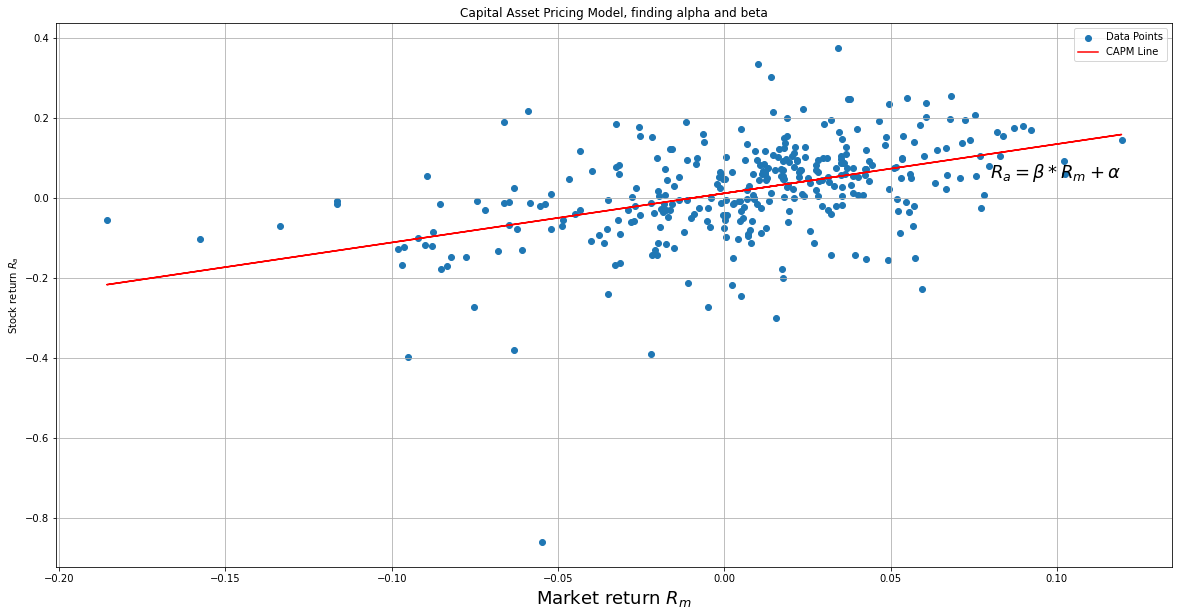

In [21]:

  if __name__ == "__main__":

    capm = CAPM(["AAPL", "^GSPC"],"1995-01-01", "2023-03-20")
    capm.initialize()
    capm.calculate_beta()
    capm.regression()


beta = Covariance(stock, market) / Variance(market)

How risky is your portfolio related to the market.

* β = 1 > stock moving exactly with the market <h5>
* β > 1 > stock market risk is higher than that of an average stock <h5>
* β < 1 > stock market risk is lower than that of an average stock <h5>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                   JPM        ^GSPC
Date                               
2010-01-31   27.732588  1073.869995
2010-02-28   29.890528  1104.489990
2010-03-31   31.870403  1169.430054
2010-04-30   30.358879  1186.689941
2010-05-31   28.219931  1089.410034
...                ...          ...
2022-11-30  137.166794  4080.110107
2022-12-31  133.116730  3839.500000
2023-01-31  139.960007  4076.600098
2023-02-28  143.350006  3970.149902
2023-03-31  125.809998  3916.639893

[159 rows x 2 columns]
            stock_adj_close  market_adj_close  stock_returns  market_returns
Date                                                                        
2010-02-28        29.890528       1104.489990       0.074933        0.028115
2010-03-31        31.870403       1169.430054       0.064136        0.057133
2010-04-30        30.358879       1186.689941      -0.048589  

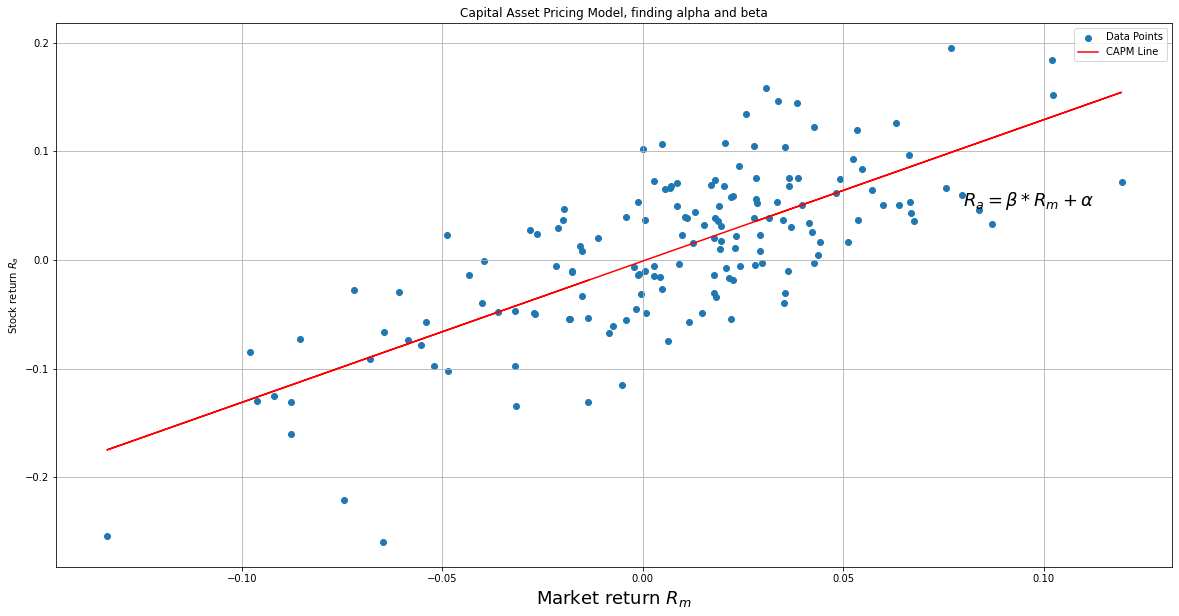

In [22]:
  if __name__ == "__main__":

    capm = CAPM(["JPM", "^GSPC"],"2010-01-01", "2023-03-20")
    capm.initialize()
    capm.calculate_beta()
    capm.regression()

<h2> Python class for multiple stocks <h2>
<h5> not for portfolios - calculate beta for portfolios with weights <h5>

In [18]:
class CAPM_port:

  def __init__(self, stocks, start_date, end_date):
    self.stocks = stocks
    self.data = None
    self.start_date = start_date
    self.end_date = end_date

  def download_data(self):
    data = {}
    
    for stock in self.stocks:
      ticker = yf.download(stock, self.start_date, self.end_date)
      data[stock] = ticker["Adj Close"]
      
    return pd.DataFrame(data)

  def initialize(self):
    stock_data = self.download_data()
    stocks_data = stock_data.resample("M").last() #using monthly returns

    #calculating logarithmic monthly return for each stock in the portfolio in relation to the market
    stock_returns = pd.DataFrame()
    for stock in self.stocks:
      stock_returns[stock] = np.log(stocks_data[stock]/stocks_data[stock].shift(1))
    market_returns = np.log(stocks_data[self.stocks[0]]/stocks_data[self.stocks[0]].shift(1))

    #creating a dataframe with stock and market returns
    self.data = pd.concat([stock_returns, market_returns], axis=1)
    self.data.columns = self.stocks + ["market"]

    self.data = self.data.dropna()
  
  def calculate_beta(self):
    #covariance matrix
    covariance_matrix = np.cov(self.data.T)
    beta_values = {}

    #calculating beta for each stock in the portfolio
    for stock in self.stocks:
      beta = covariance_matrix[self.stocks.index(stock),-1] / covariance_matrix[-1,-1]
      beta_values[stock] = beta
      
    print("Beta values are: ", beta_values)

In [23]:
  if __name__ == "__main__":

    capm = CAPM_port(["^GSPC", "AAPL", "MSFT", "JPM", "PEP", "KO", "MCD", "WMT", "VALE", "PBR", "BMA"],"2000-01-01", "2023-03-20")
    capm.initialize()
    capm.calculate_beta()
   

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Beta values are:  {'^GSPC': 1.0, 'AAPL': 1.2172273152308761, 'MSFT': 0.9745068261644186, 'JPM': 1.2465972587668679, 'PEP': 0.5320076821397155, 'KO': 0.5559651811709064, 'MCD': 0.5420167164813671, 'WMT': 0.39083980642145005, 'VALE': 1.2709159